In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import month_plot, quarter_plot 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_pacf


In [22]:
df = pd.read_csv("C:\\Projects\\time_series\\Bitcoin-prices\\Exponential Smoothing and Holt Winters\\weekly_customer_complaints.csv", index_col = "week" , parse_dates=True)
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [23]:
#Information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-01-01 to 2022-12-26
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaints               261 non-null    object
 1   discount_rate            261 non-null    object
 2   small_commercial_event   261 non-null    int64 
 3   medium_commercial_event  261 non-null    int64 
 4   big_commercial_event     261 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.2+ KB


# Data Preprocessing

In [24]:
#remove comma and transform into float
df['complaints'] = df['complaints'].str.replace(',','').astype(float)
df

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750.0,37.26%,1,0,0
2018-01-08,1701.0,35.38%,0,0,0
2018-01-15,1711.0,36.22%,1,0,0
2018-01-22,1443.0,38.33%,1,0,0
2018-01-29,1397.0,36.34%,0,0,0
...,...,...,...,...,...
2022-11-28,4444.0,29.89%,0,1,0
2022-12-05,4920.0,28.48%,1,0,0
2022-12-12,5342.0,28.89%,0,0,0


In [27]:
# setting frq to W implies that the week starts on a Sunday
df = df.asfreq("W-Mon")
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq='W-MON')

# Exploratory Analysis

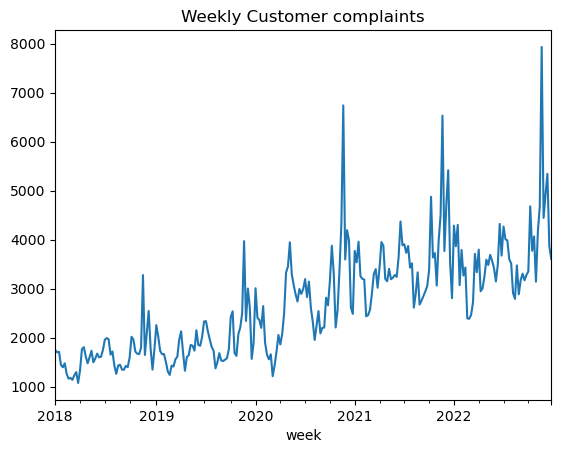

In [28]:
# Daily complains plot 
df['complaints'].plot(title = 'Weekly Customer complaints')
plt.show()

C:\Users\sachi\AppData\Local\Temp\ipykernel_7056\3170996168.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['complaints'].resample('M').mean(), ylabel='Closing')


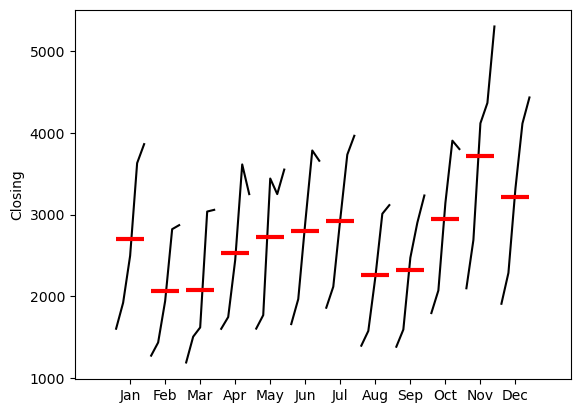

In [33]:
#plotting the monthly complaints 
month_plot(df['complaints'].resample('M').mean(), ylabel='Closing')
plt.show()

C:\Users\sachi\AppData\Local\Temp\ipykernel_7056\2026352850.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['complaints'].resample('Q').mean(), ylabel='Complaints')


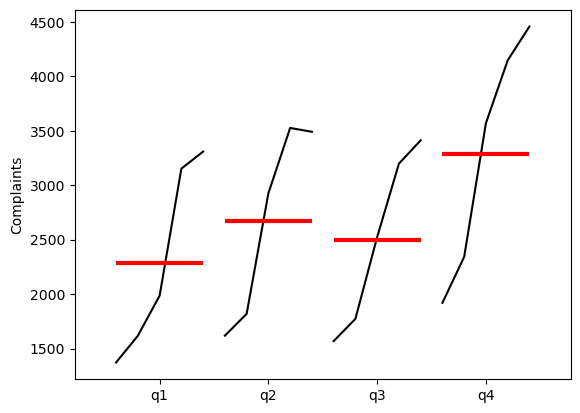

In [36]:
#plotting the Quaterly complaints 
quarter_plot(df['complaints'].resample('Q').mean(), ylabel='Complaints')
plt.show()

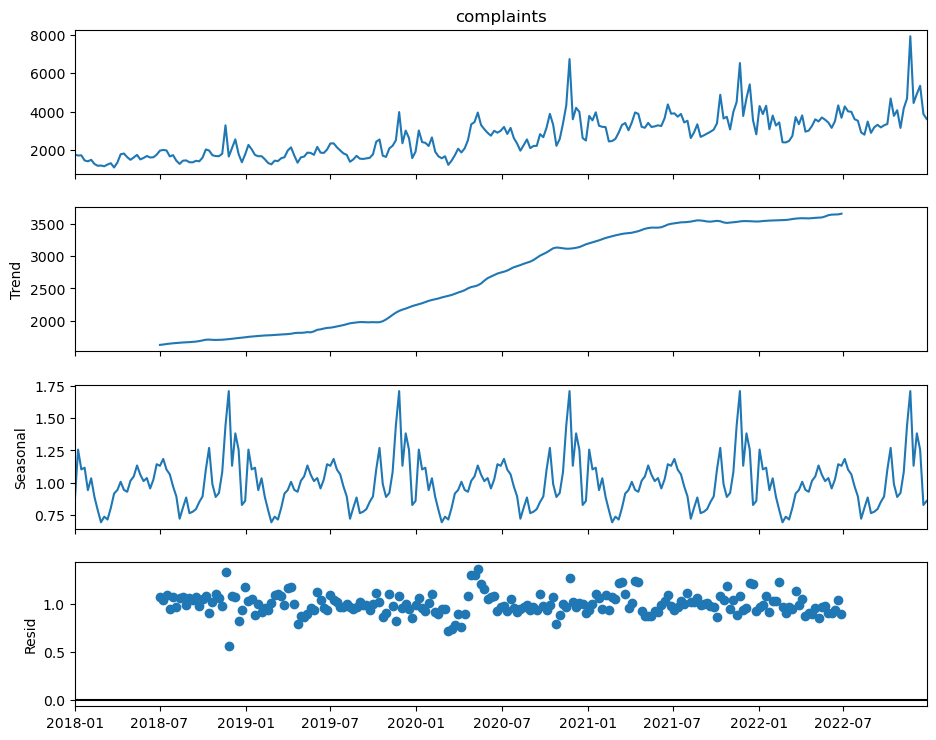

In [38]:
# Seasnoal decomposition plots for Complaints 
decomposition = seasonal_decompose(df['complaints'], model = 'mul', period =52)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

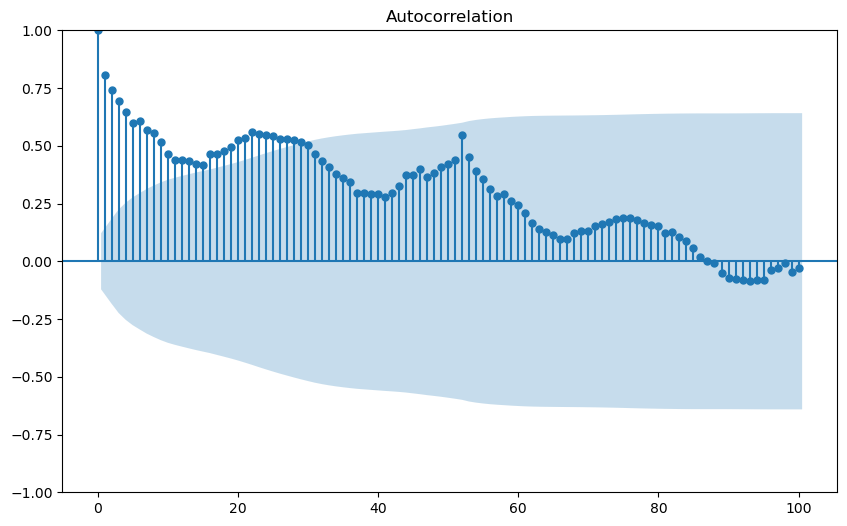

In [40]:
# plot the autocorrelation ACF 
fig , ax = plt.subplots(figsize = (10,6))
plot_acf(df['complaints'],lags=100,ax=ax)
plt.show()

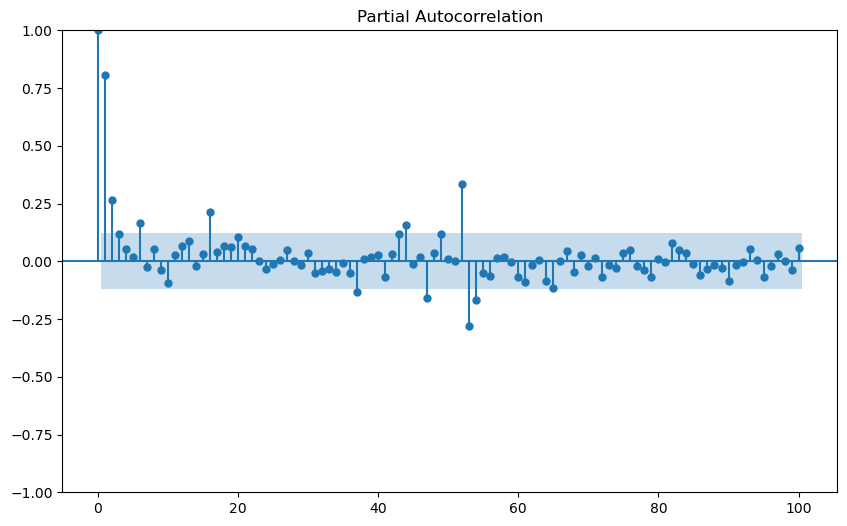

In [41]:
# plot the partial autocorrelation (PACF)
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(df['complaints'], lags =100, ax=ax)
plt.show()

# training and test

# goal : to predict the next quarter (13 weeks)


In [46]:
# training and test split
periods =13
train, test = df.iloc[:-periods,0],df.iloc[-periods:,0]

In [47]:
train

week
2018-01-01    1750.0
2018-01-08    1701.0
2018-01-15    1711.0
2018-01-22    1443.0
2018-01-29    1397.0
               ...  
2022-08-29    2885.0
2022-09-05    3177.0
2022-09-12    3306.0
2022-09-19    3170.0
2022-09-26    3279.0
Freq: W-MON, Name: complaints, Length: 248, dtype: float64

In [48]:
test

week
2022-10-03    3350.0
2022-10-10    4679.0
2022-10-17    3773.0
2022-10-24    4065.0
2022-10-31    3142.0
2022-11-07    4164.0
2022-11-14    4677.0
2022-11-21    7931.0
2022-11-28    4444.0
2022-12-05    4920.0
2022-12-12    5342.0
2022-12-19    3868.0
2022-12-26    3607.0
Freq: W-MON, Name: complaints, dtype: float64

# simple smoothing exponential

In [49]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [55]:
# Simple Exponential Smoothing Model and Prediction

model_simple = SimpleExpSmoothing(train).fit()
prediction_simple = model_simple.forecast(len(test))

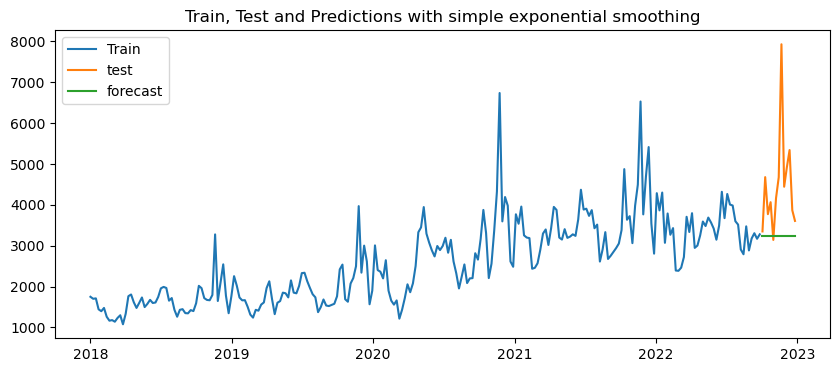

In [59]:
# plot training, test and forecasts
plt.figure(figsize=(10,4))
plt.plot(train, label='Train')
plt.plot(test, label ='test')
plt.plot(prediction_simple, label ='forecast')
plt.title("Train, Test and Predictions with simple exponential smoothing")
plt.legend()
plt.show()

# Double expontential smoothing

In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [66]:
model_double = ExponentialSmoothing(train,
                                    trend='mul',
                                    seasonal=None).fit()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [67]:
# predictions 
prediction_double = model_double.forecast(len(test))
prediction_double

2022-10-03    3257.344635
2022-10-10    3268.523454
2022-10-17    3279.740638
2022-10-24    3290.996318
2022-10-31    3302.290626
2022-11-07    3313.623695
2022-11-14    3324.995657
2022-11-21    3336.406647
2022-11-28    3347.856798
2022-12-05    3359.346245
2022-12-12    3370.875122
2022-12-19    3382.443564
2022-12-26    3394.051708
Freq: W-MON, dtype: float64

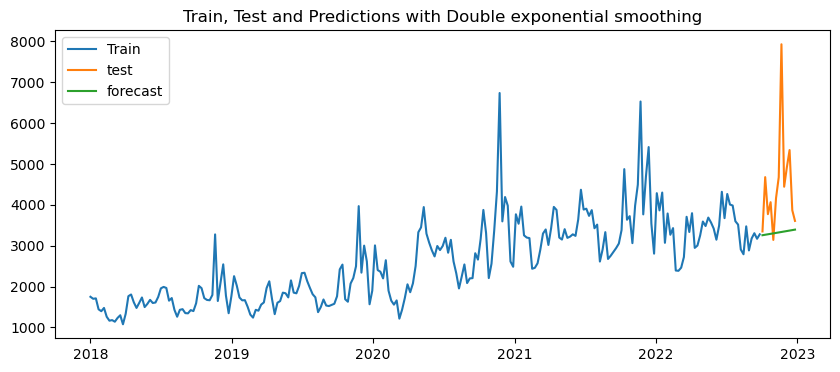

In [68]:
# plot training, test and forecasts
plt.figure(figsize=(10,4))
plt.plot(train, label='Train')
plt.plot(test, label ='test')
plt.plot(prediction_double, label ='forecast')
plt.title("Train, Test and Predictions with Double exponential smoothing")
plt.legend()
plt.show()

# Triple Exponential Smoothing( Holt_winters method)

In [69]:
model_triple = ExponentialSmoothing(train,
                                    trend='add',
                                    seasonal='mul',
                                    seasonal_periods=52).fit()


In [70]:

# predictions 
prediction_triple = model_triple.forecast(len(test))
prediction_triple

2022-10-03    4017.804513
2022-10-10    5026.112649
2022-10-17    3906.495056
2022-10-24    3520.097647
2022-10-31    3411.453535
2022-11-07    4225.833134
2022-11-14    5310.015382
2022-11-21    7248.972447
2022-11-28    4306.919510
2022-12-05    5260.204038
2022-12-12    5265.634052
2022-12-19    3420.194303
2022-12-26    3241.009377
Freq: W-MON, dtype: float64

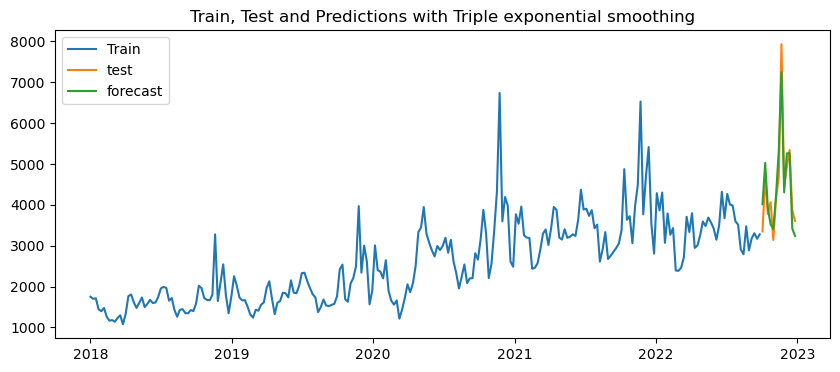

In [71]:
# plot training, test and forecasts
plt.figure(figsize=(10,4))
plt.plot(train, label='Train')
plt.plot(test, label ='test')
plt.plot(prediction_triple, label ='forecast')
plt.title("Train, Test and Predictions with Triple exponential smoothing")
plt.legend()
plt.show()

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,root_mean_squared_error

In [85]:
# calculating the MAE,RMSE, and MAPE 
mae = mean_absolute_error(test,prediction_triple)
print(f"The MAE is {mae:2f}")
# calculating the MAE,RMSE, and MAPE 
rmse = root_mean_squared_error(test,prediction_triple)
print(f"The rmse is {rmse:2f}")
mape = mean_absolute_percentage_error(test,prediction_triple)
print(f"The mape is {mape*100:2f}")


The MAE is 362.083921
The rmse is 420.469412
The mape is 8.434122


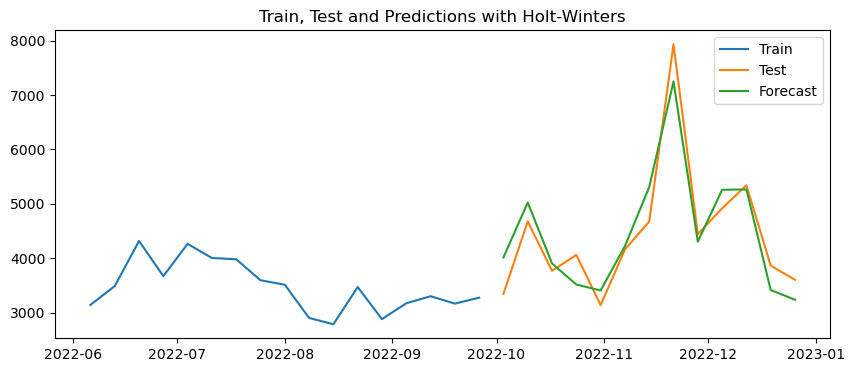

The MAE is 362.08
The RMSE is 420.47
The MAPE is 8.43 %


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [87]:
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Plot training, test, and forecasts
  plt.figure(figsize = (10,4))
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = mean_squared_error(test, predictions, squared = False)
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

# Call the model_assessment function with the specified arguments
model_assessment(train['2022-06':], test, prediction_triple, "Holt-Winters")

# predicting the future

In [88]:
#Triple Exponential Smoothing Model 
# to predict the future you include the whole data as training data 
model_final = ExponentialSmoothing(df.complaints,
                                    trend='add',
                                    seasonal='mul',
                                    seasonal_periods=52).fit()


In [92]:
# predictions
forecast = model_final.forecast(16)
forecast

2023-01-02    4822.392055
2023-01-09    4354.213980
2023-01-16    4555.417025
2023-01-23    3692.526285
2023-01-30    4104.283587
2023-02-06    3598.605726
2023-02-13    3267.538508
2023-02-20    2765.201166
2023-02-27    2858.721603
2023-03-06    2918.355536
2023-03-13    3289.125574
2023-03-20    3770.290894
2023-03-27    3649.291149
2023-04-03    4070.727711
2023-04-10    3871.745306
2023-04-17    3848.583057
Freq: W-MON, dtype: float64

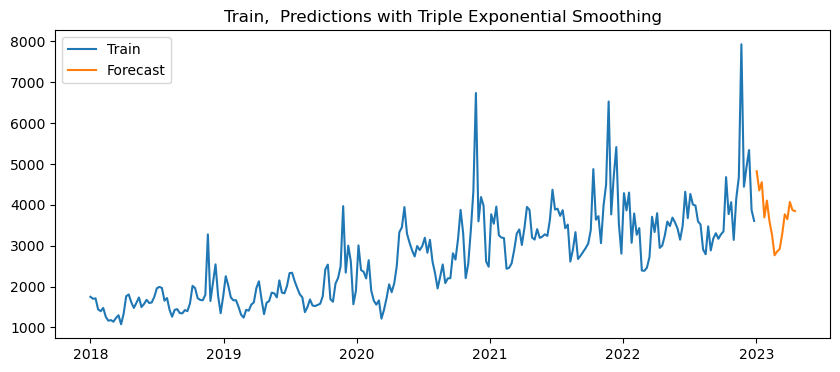

In [93]:
# Plot training, test, and forecasts
plt.figure(figsize = (10,4))
plt.plot(df.complaints, label = 'Train')
plt.plot(forecast, label = "Forecast")
plt.title(f"Train,  Predictions with Triple Exponential Smoothing")
plt.legend()
plt.show()

In [94]:
def plot_future(y,forecast,title):
    # Plot training, test, and forecasts
    plt.figure(figsize = (10,4))
    plt.plot(df.complaints, label = 'Train')
    plt.plot(forecast, label = "Forecast")
    plt.title(f"Train,  Predictions with {title}")
    plt.legend()
    plt.show()
    

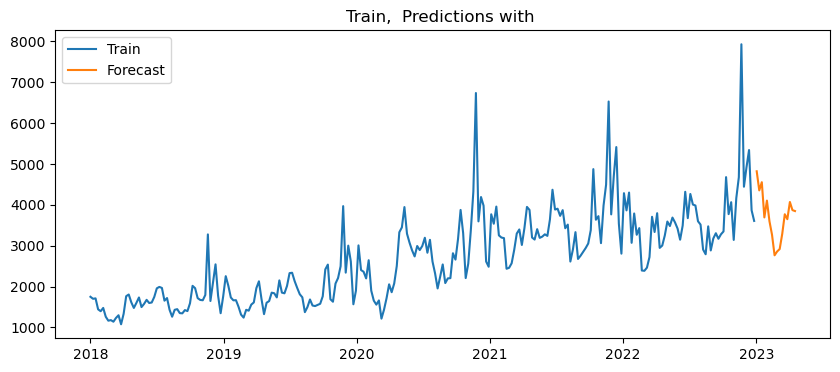

In [96]:
plot_future(df.complaints,forecast,"")
   
    

# daily data

In [103]:

df_daily = pd.read_csv("C:\\Projects\\Time_series\\Bitcoin-prices\\Exponential Smoothing and Holt Winters\\bitcoin_price.csv",index_col = "Date",parse_dates= True)
df_daily.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [104]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3392 entries, 2014-09-17 to 2023-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3392 non-null   float64
 1   High       3392 non-null   float64
 2   Low        3392 non-null   float64
 3   Close      3392 non-null   float64
 4   Adj Close  3392 non-null   float64
 5   Volume     3392 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 185.5 KB


In [105]:
df_daily.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq=None)

In [106]:
df_daily = df_daily.asfreq("D")
df_daily.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq='D')

In [107]:
#training and Test Split 
periods = 30 
train , test =df_daily.iloc[:-periods,3],df_daily.iloc[-periods:,3]


In [110]:
#Triple Exponential Smoothing Model 
# to predict the future you include the whole data as training data 
model_final = ExponentialSmoothing(train,
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=7).fit()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [111]:
# predictions
forecast = model_final.forecast(len(test))
forecast

2023-12-01    37911.560426
2023-12-02    38122.396971
2023-12-03    38430.750184
2023-12-04    38608.924172
2023-12-05    38792.468561
2023-12-06    38868.699147
2023-12-07    38817.596322
2023-12-08    39014.333842
2023-12-09    39231.303211
2023-12-10    39548.625819
2023-12-11    39731.982540
2023-12-12    39920.865878
2023-12-13    39999.313863
2023-12-14    39946.724557
2023-12-15    40149.184788
2023-12-16    40372.465373
2023-12-17    40699.018277
2023-12-18    40887.708488
2023-12-19    41082.086074
2023-12-20    41162.815959
2023-12-21    41108.696931
2023-12-22    41317.046336
2023-12-23    41546.821719
2023-12-24    41882.873410
2023-12-25    42077.052252
2023-12-26    42277.083903
2023-12-27    42360.162062
2023-12-28    42304.468818
2023-12-29    42518.878701
2023-12-30    42755.337802
Freq: D, dtype: float64

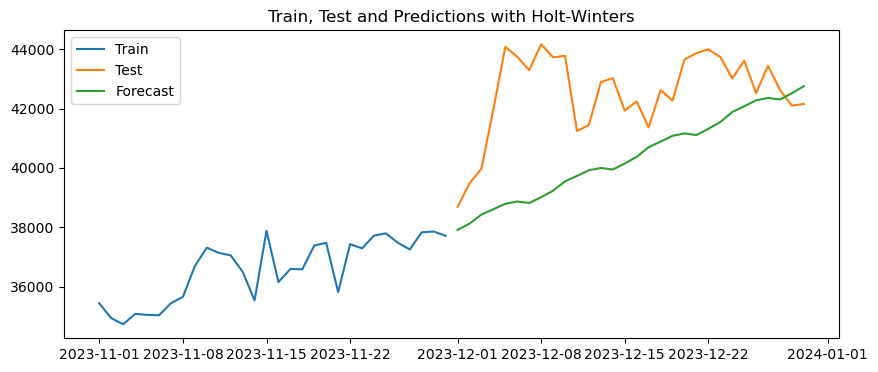

The MAE is 2242.57
The RMSE is 2695.30
The MAPE is 5.21 %


: 

In [114]:
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Plot training, test, and forecasts
  plt.figure(figsize = (10,4))
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = root_mean_squared_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

# Call the model_assessment function with the specified arguments
model_assessment(train['2023-11':], test, forecast, "Holt-Winters")